In [20]:
import optical_gating_analysis as OG
import matplotlib.pyplot as plt
import numpy as np
import j_py_sad_correlation as jps

from scipy.signal import find_peaks
from scipy import signal

import tifffile as tf

In [21]:
data_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif"
ref_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\150456.tif"
ref_period = 73.106274
oog2 = OG.BasicOpticalGating()
oog2.sequence_manager.set_source(data_src)
oog2.sequence_manager.set_reference_sequence(ref_src)
oog2.sequence_manager.reference_period = ref_period
oog2.settings["pi_space"] = False
oog2.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.30.44 vid bloodless 200fps\ref-frames-2024-04-26-17.29.51\150456.tif
Getting SADs
Getting phases


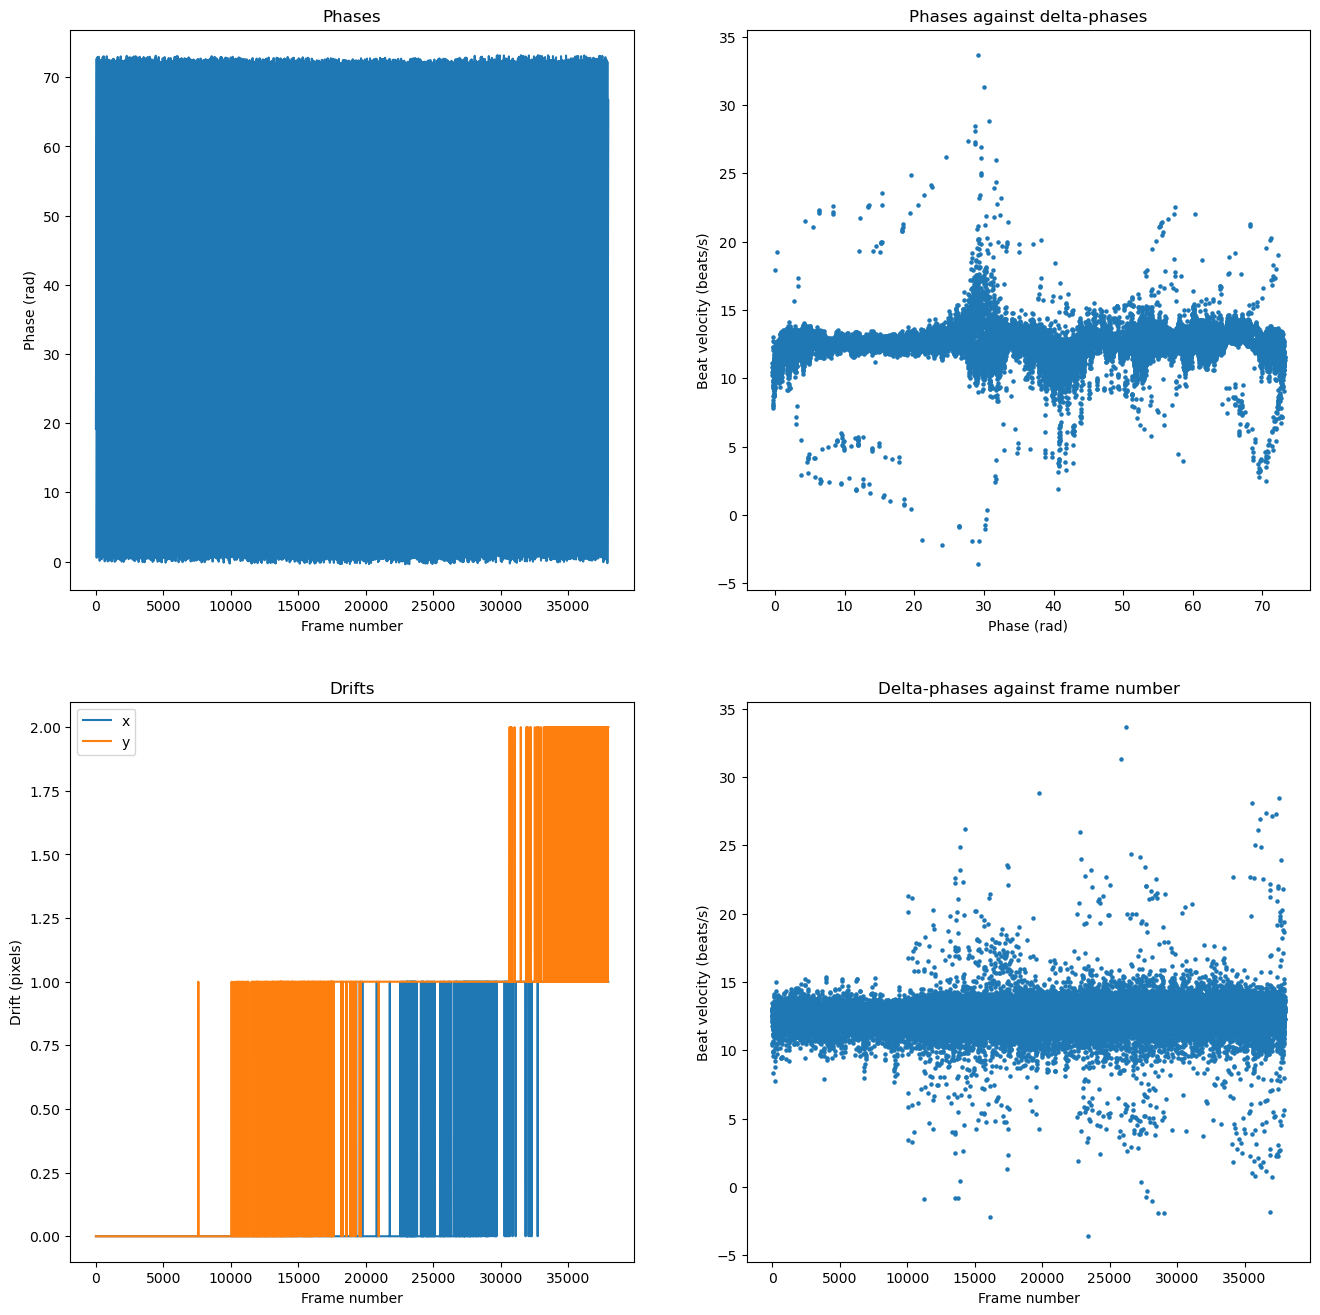

In [22]:
oog2.plot_summary()

In [23]:
data_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\Allied Vision Technologies GS650 0001f61c\*tif"
ref_src = r"E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\ref-frames-2024-04-26-17.29.51\150456.tif"
ref_period = 73.106274
oog = OG.BasicOpticalGating()
oog.sequence_manager.set_source(data_src)
oog.sequence_manager.set_reference_sequence(ref_src)
oog.sequence_manager.reference_period = ref_period
oog.settings["pi_space"] = False
oog.run()

Setting source to E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\Allied Vision Technologies GS650 0001f61c\*tif
Loading reference sequence from E:\data\my data\Arrhythmic imaging April 2024 2\2024-04-26 17.36.28 vid bloodless 80fps\ref-frames-2024-04-26-17.29.51\150456.tif
Getting SADs
Getting phases


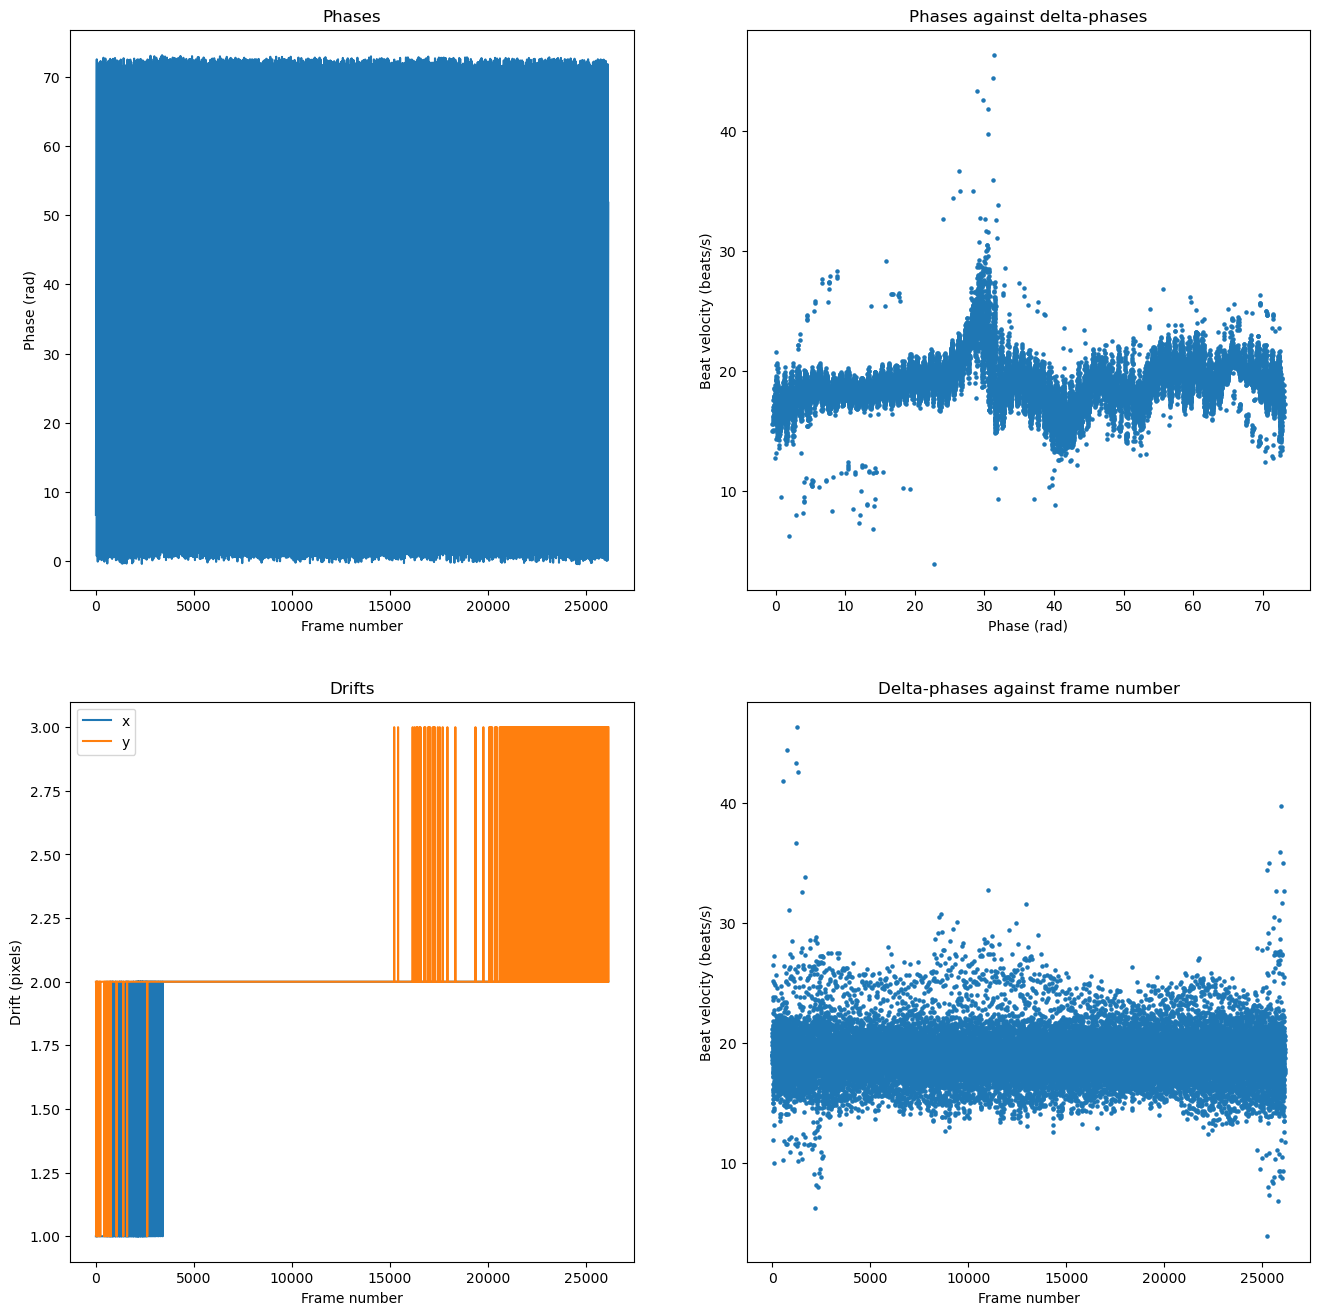

In [24]:
oog.plot_summary()

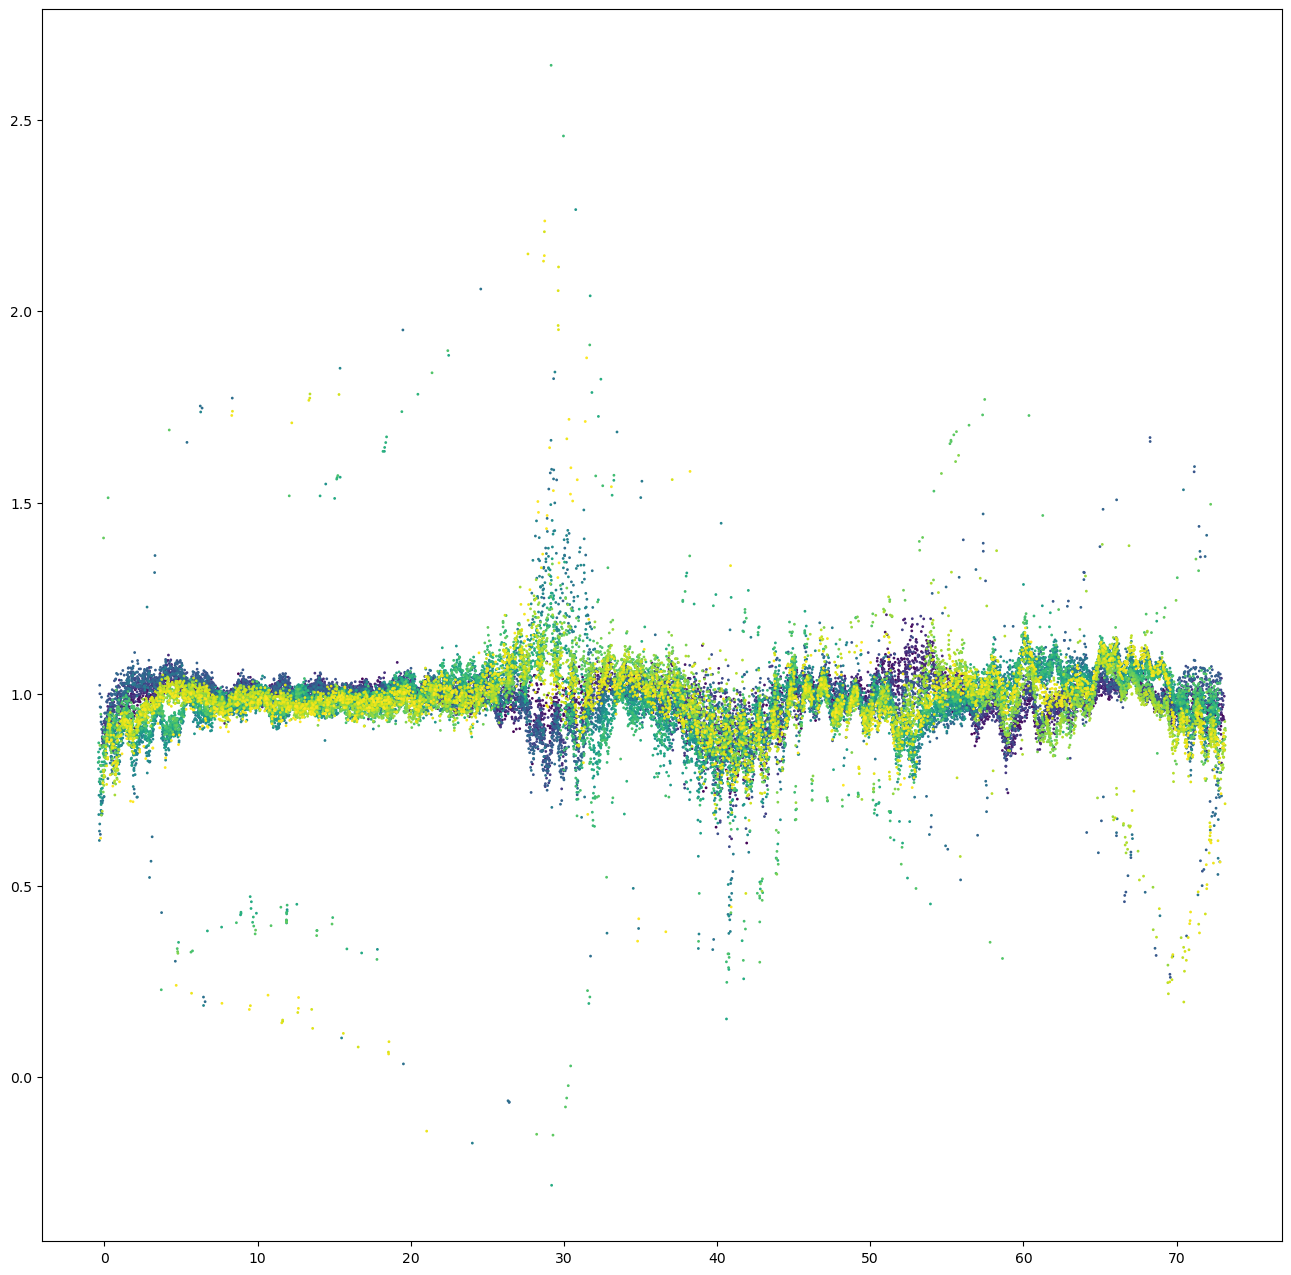

In [25]:
plt.figure(figsize = (16,16))
plt.scatter(oog2.phases[1::], oog2.delta_phases, s = 1, c = range(len(oog2.phases[1::])))
plt.show()

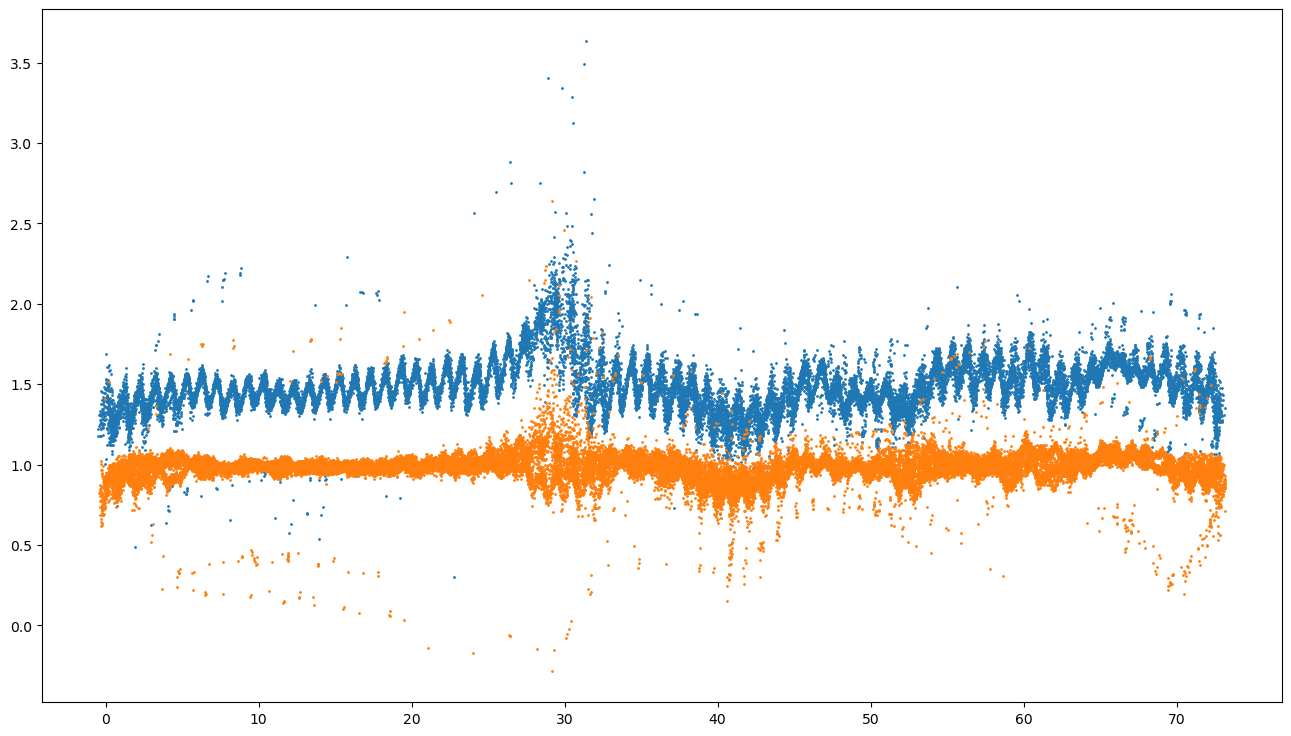

In [26]:
# Plot moving average
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, s = 1)
plt.scatter(oog2.phases[1::], oog2.delta_phases, s = 1)
plt.show()

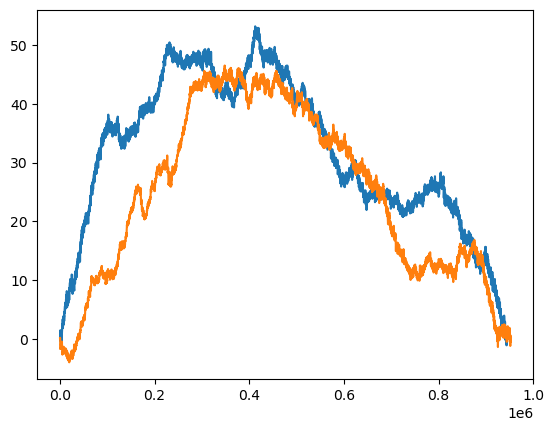

In [27]:
plt.plot(np.cumsum(oog.phases)[1::], np.cumsum(oog.delta_phases - np.mean(oog.delta_phases)))
plt.plot(np.cumsum(oog2.phases / 1.45)[1::], np.cumsum(oog2.delta_phases - np.mean(oog2.delta_phases)))

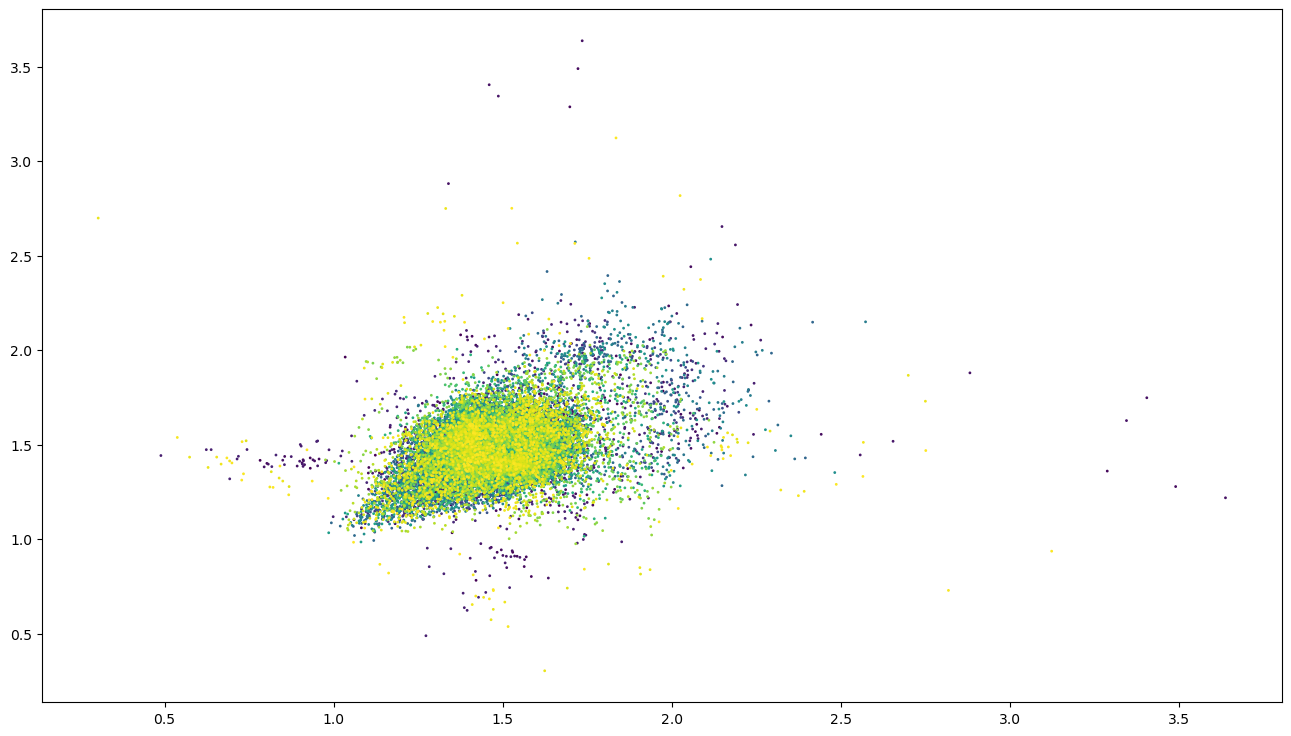

In [28]:
plt.figure(figsize = (16,9))
plt.scatter(oog.delta_phases[0:-1], oog.delta_phases[1::], s = 1, c = range(len(oog.delta_phases)-1))
plt.show()

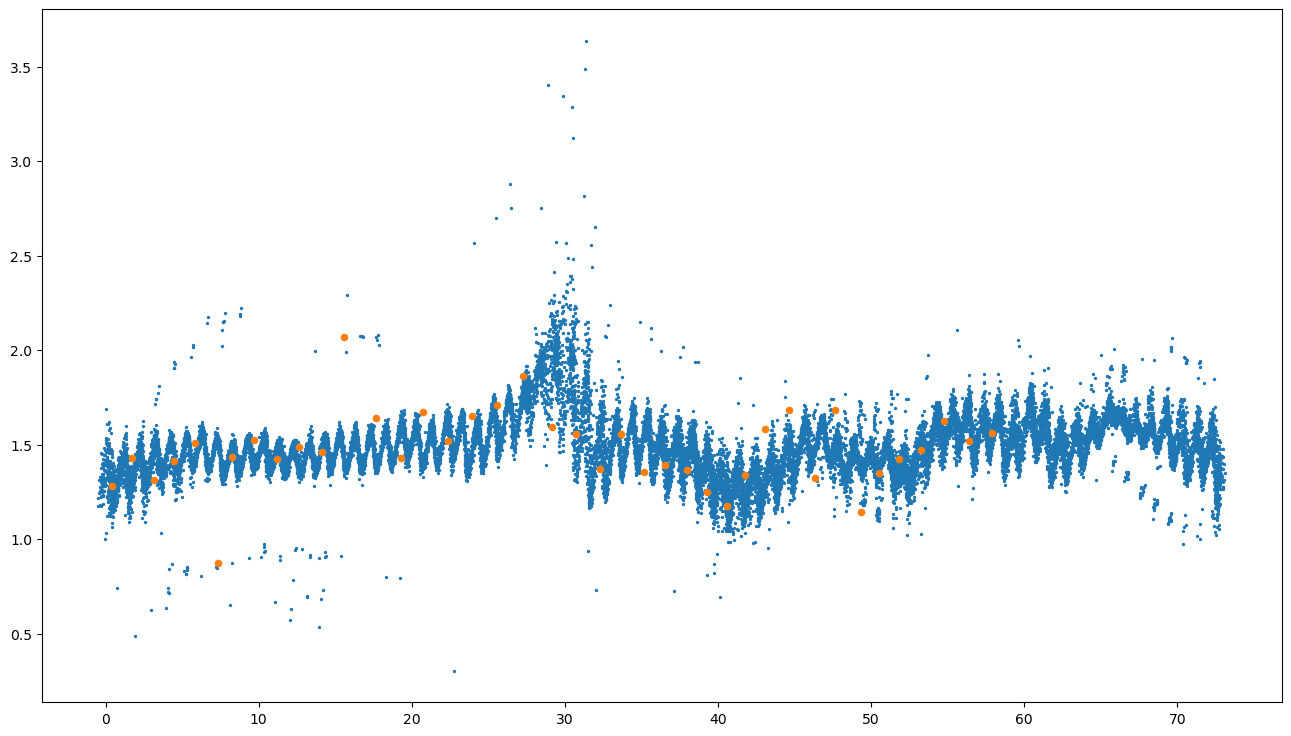

In [29]:
plt.figure(figsize = (16,9))
plt.scatter(oog.phases[1::], oog.delta_phases, s = 2)
plt.scatter(oog.phases[2000:2040], oog.delta_phases[2000:2040], s = 20)
plt.show()

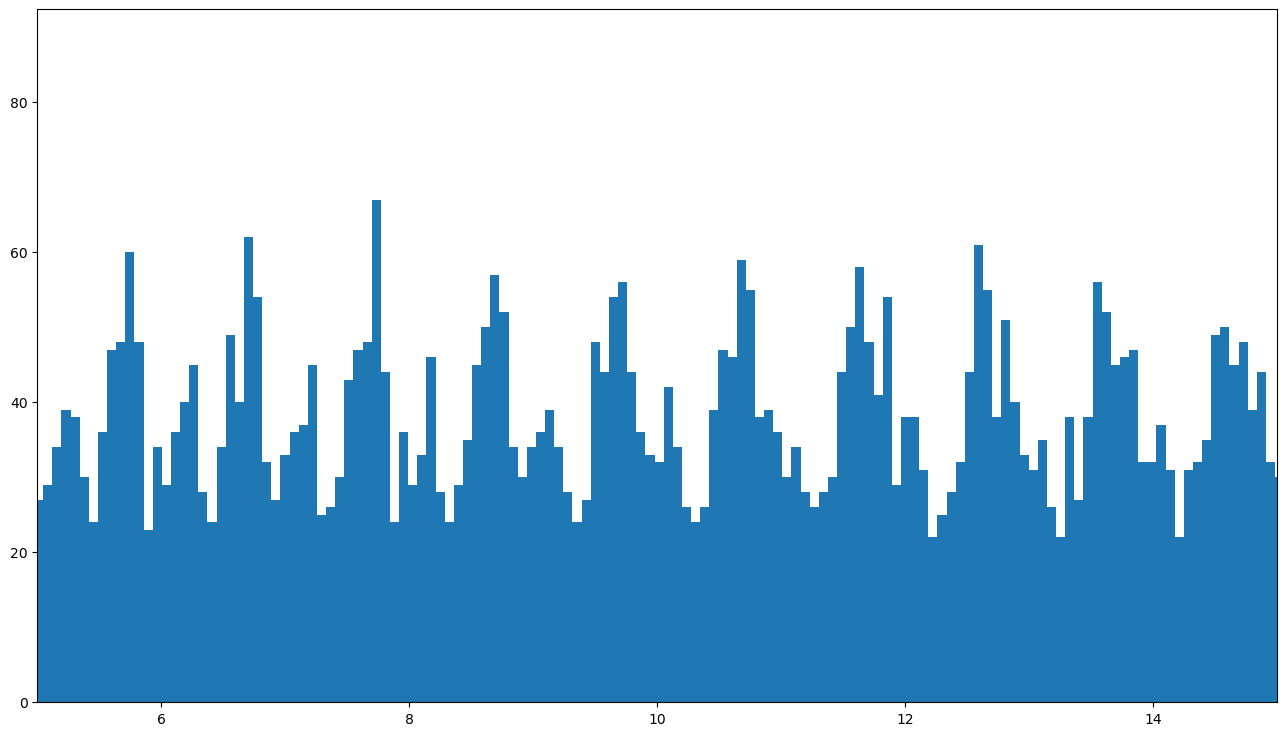

In [47]:
plt.figure(figsize = (16,9))
plt.hist(oog2.phases, bins = 1000)
plt.xlim(5,15)
plt.show()

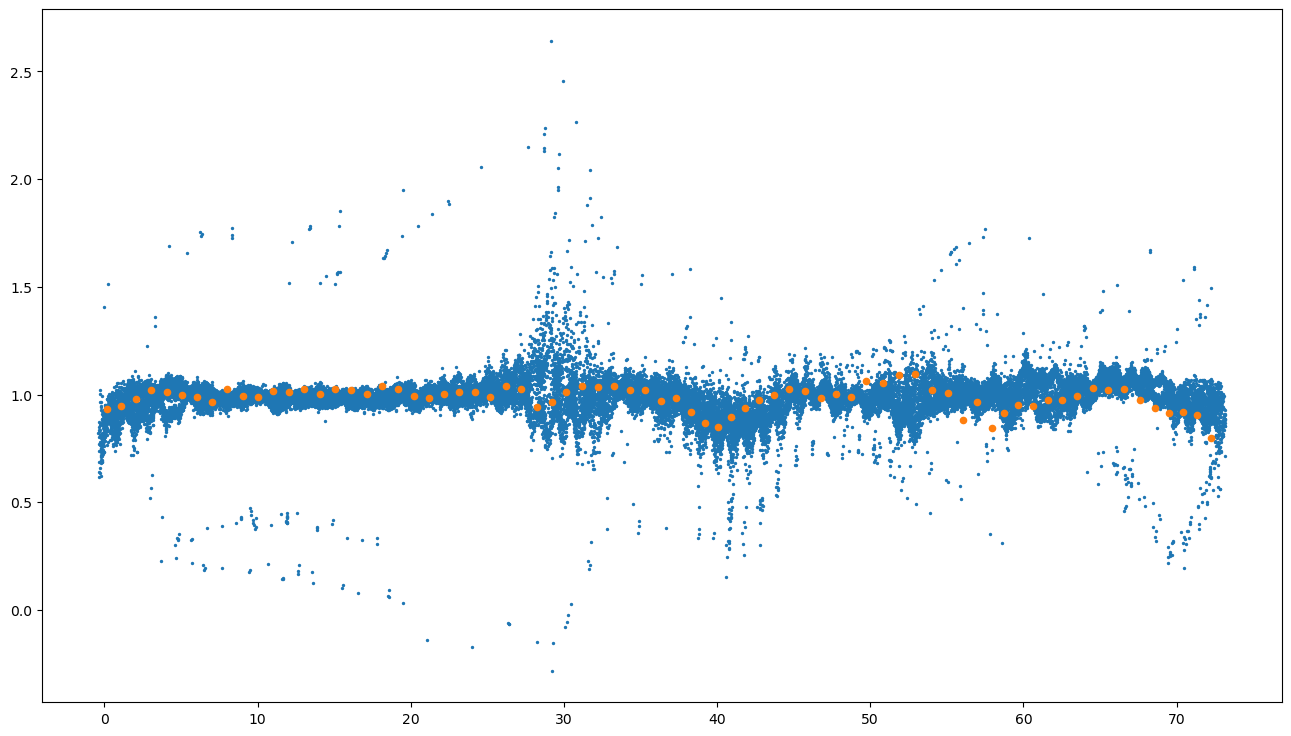

In [43]:
plt.figure(figsize = (16,9))
plt.scatter(oog2.phases[1::], oog2.delta_phases, s = 2)
startat = 1985
count = 74
plt.scatter(oog2.phases[startat:startat+count], oog2.delta_phases[startat:startat+count], s = 20)
plt.show()

In [33]:
np.savetxt("oog_200_phases.txt", oog2.phases)
np.savetxt("oog_200_delta_phases.txt", oog2.delta_phases)
np.savetxt("oog_200_sads.txt", oog2.sads)

np.savetxt("oog_80_phases.txt", oog.phases)
np.savetxt("oog_80_delta_phases.txt", oog.delta_phases)
np.savetxt("oog_80_sads.txt", oog.sads)

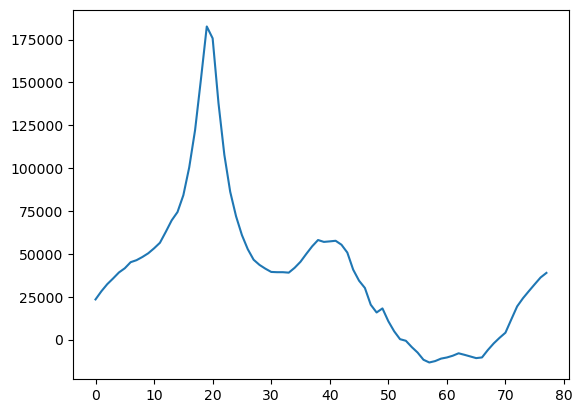

In [34]:
plt.plot(np.mean(oog.sads,axis=0) - oog.sads[300])

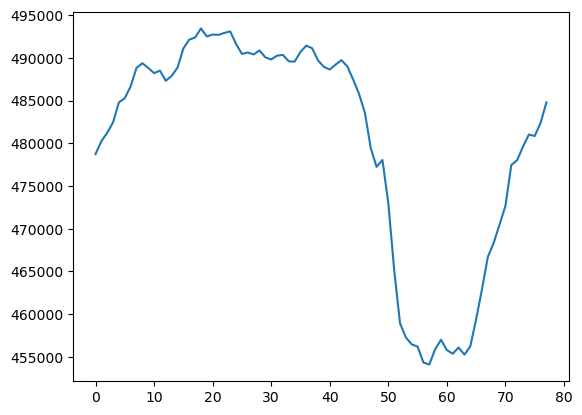

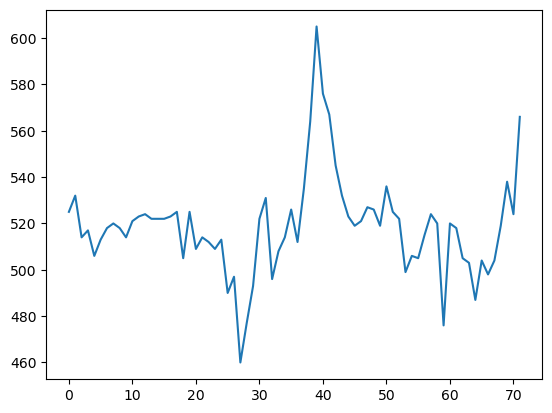

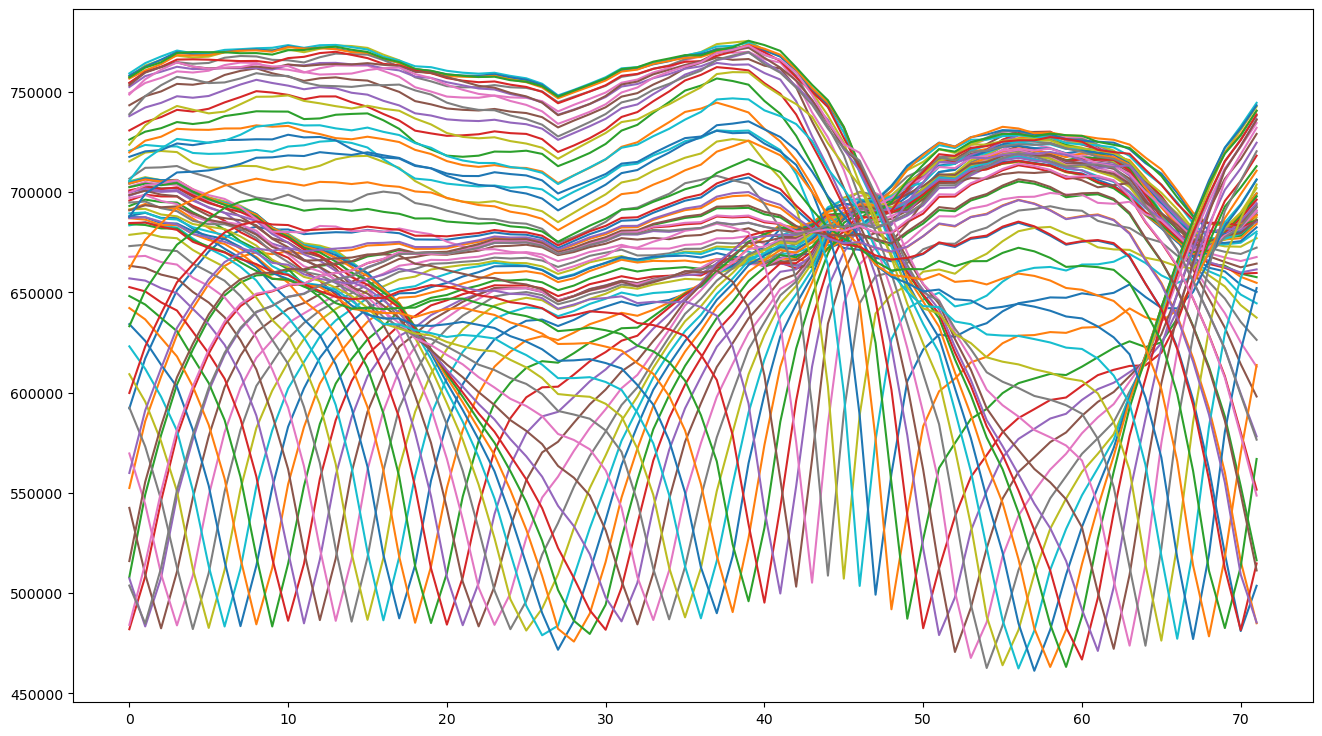

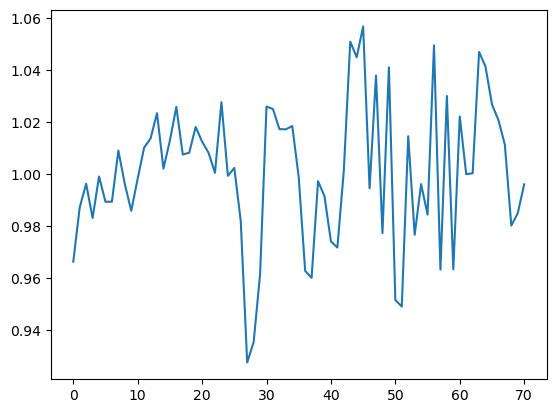

In [35]:
analyser = OG.BasicOpticalGating()
analyser.settings["pi_space"] = False

# Get mean sads for each frame
sads = []
counts = []
for i in range(3, oog2.sequence_manager.reference_sequence.shape[0] - 3):
    locs = np.where(np.array(oog2.frame_minimas) == i)[0]
    counts.append(len(locs))
    sads.append(np.mean(np.array(oog2.sads)[locs], axis = 0))

phases = []
for sad in sads:
    phases.append(analyser.get_phase(sad)[0])

plt.plot(np.sum(np.abs(np.diff(oog.sequence_manager.reference_sequence.astype(np.int32))), axis = (1,2)))
plt.show()

plt.plot(counts)
plt.show()


plt.figure(figsize = (16,9))
plt.plot(sads)
plt.show()

plt.plot(np.diff(phases))
plt.show()

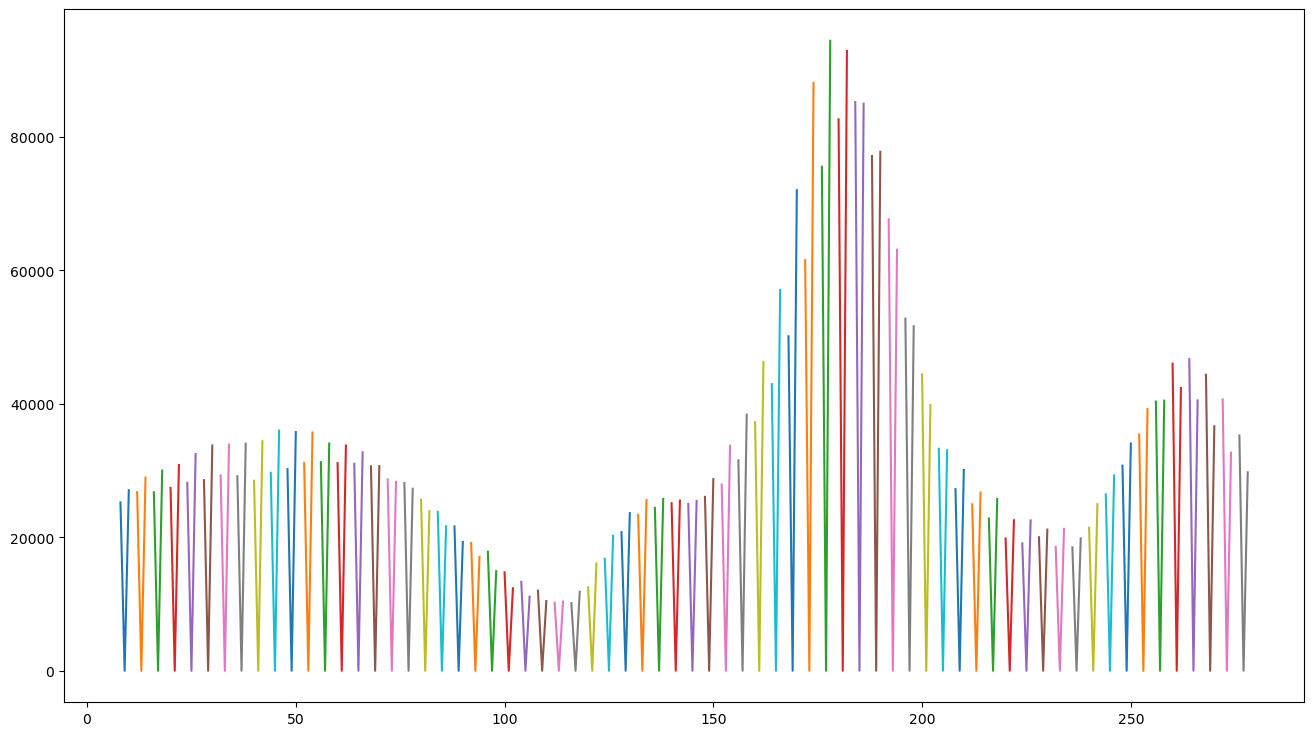

In [77]:
plt.figure(figsize = (16,9))
for i in range(2, len(sads) - 2):
    minima = np.argmin(sads[i])
    plt.plot(range(4*i, 4*i+3), sads[i][minima - 1:minima + 2] - np.min(sads[i][minima - 1:minima + 2]))

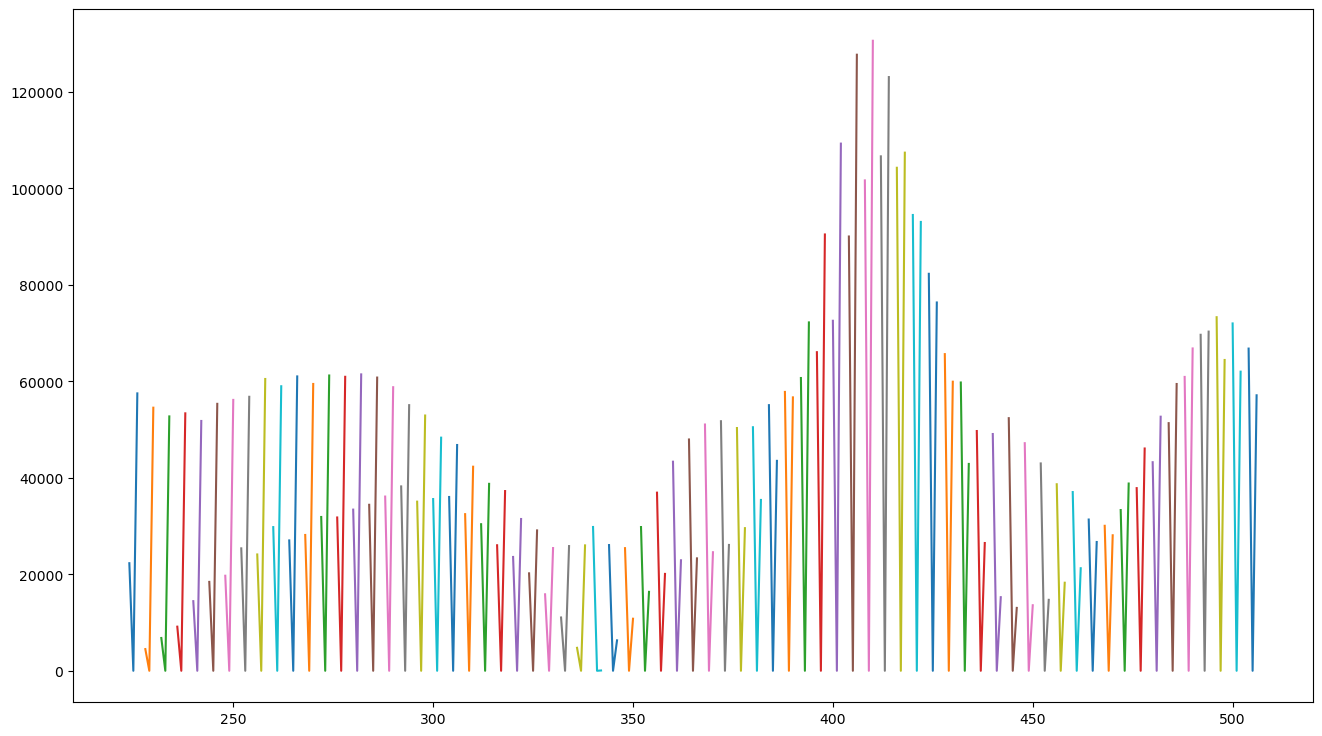

In [99]:
plt.figure(figsize = (16,9))
for i in range(56, 56+71):
    minima = np.argmin(oog2.sads[i][2:-2]) + 2
    plt.plot(range(4*i, 4*i+3), oog2.sads[i][minima - 1:minima + 2] - np.min(oog2.sads[i][minima - 1:minima + 2]))

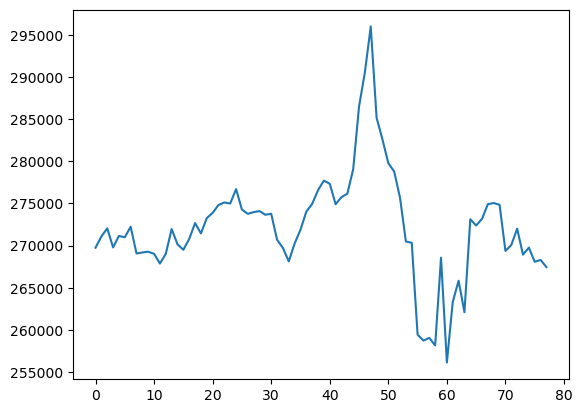

In [84]:
plt.plot(np.min(oog2.sads, axis = 0))
plt.show()

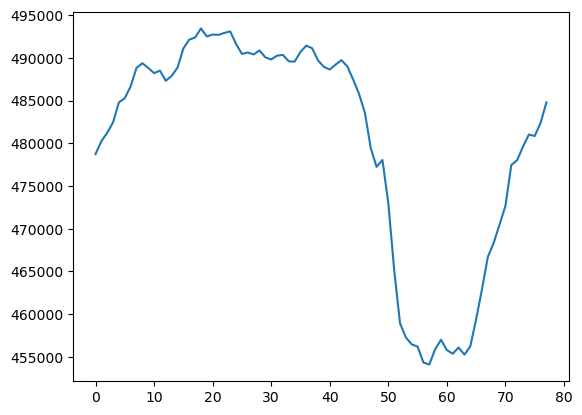

In [79]:
plt.plot(np.sum(np.abs(np.diff(oog2.sequence_manager.reference_sequence.astype(np.int16))), axis = (1,2)))

(470000.0, 530000.0)

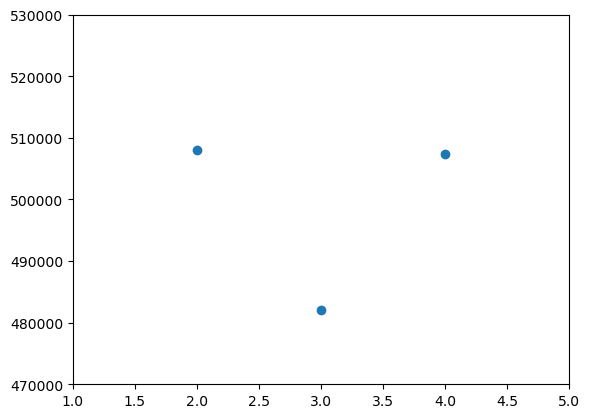

In [66]:
plt.scatter(range(len(sads[0])), sads[0])
plt.xlim(1,5)
plt.ylim(470000,530000)

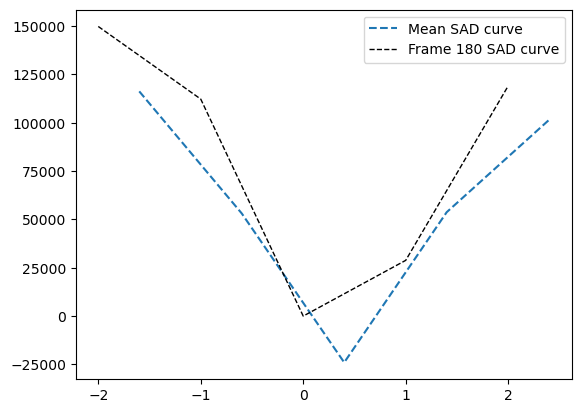

In [205]:
frame = 200
for frame in range(180,181):
    minima = np.argmin(oog2.sads[frame][2:-2]) + 2
    plt.plot(np.arange(-2,3) + 0.4, sads[minima - 2][minima - 1:minima + 4] - np.min(sads[minima - 2][minima - 1:minima + 4]) - 24000, ls = "--", label = "Mean SAD curve")
    """for i in range(2, len(sads) - 2):
        minima = np.argmin(sads[i])
        plt.plot(sads[i][minima - 1:minima + 2] - np.min(sads[i][minima - 1:minima + 2]), ls = ":")"""
    minima = np.argmin(oog2.sads[frame][2:-2]) + 2
    plt.plot(range(-2, 3), oog2.sads[frame][minima - 2:minima + 3] - np.min(oog2.sads[frame][minima - 2:minima + 3]), lw = 1, c = "black", ls = "--", label = f"Frame {frame} SAD curve")
    plt.legend()


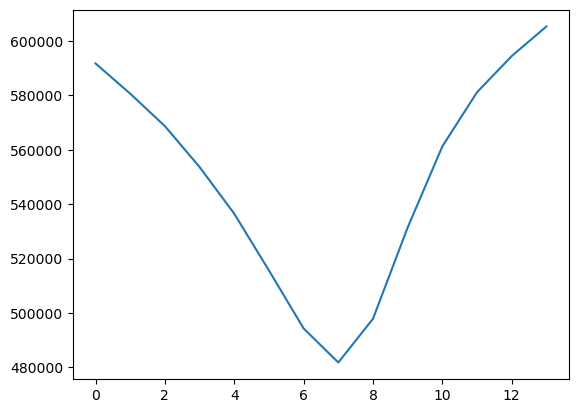

In [222]:
plt.plot(sads[30][26:40])